# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

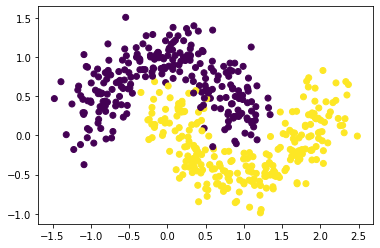

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

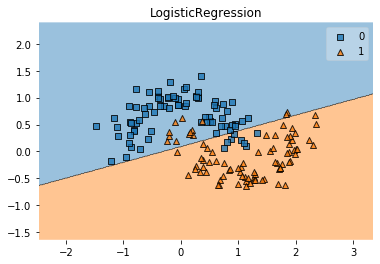

LogisticRegression f1 =  0.8726805173812998


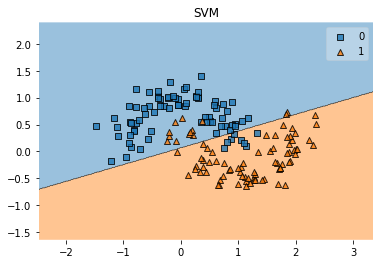

SVM f1 =  0.8726805173812998


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

from matplotlib import gridspec
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

lr = LogisticRegression(tol = 1e-3) # add some params
svm = SVC(kernel='linear', C = 0.8) # here too

### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, 
                                                    test_size = 0.33, random_state = 42)

models = zip(['LogisticRegression', 'SVM'], [lr, svm])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average = 'weighted'))

При построении модели использовалось линейное ядро, что значит, что разделяющая поверхность также линейна. Однако по графикам видно, что зависимость должна быть нелинейной. Значит нужно использрвать нелинейные ядра

## 1.2 Kernel tirck

![keep-calm](https://github.com/girafe-ai/ml-mipt/blob/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

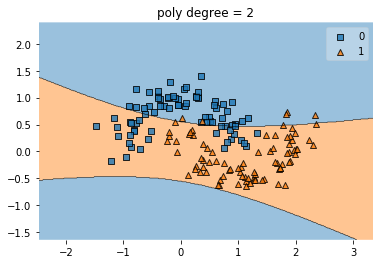

poly degree = 2 f1 =  0.7831008872102698


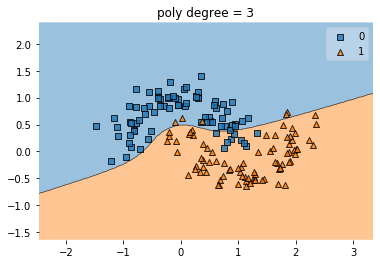

poly degree = 3 f1 =  0.9150640939866728


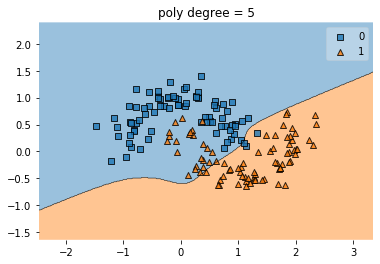

poly degree = 5 f1 =  0.8340642963593783


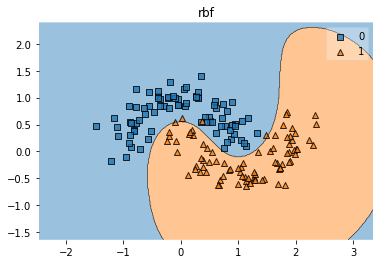

rbf f1 =  0.9757540138380574


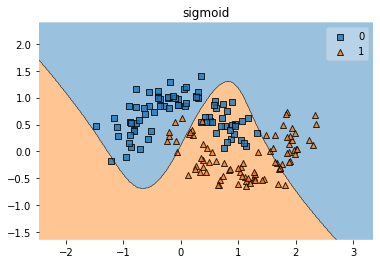

sigmoid f1 =  0.5937902221212901


In [8]:
### YOUR CODE HERE
models = zip(['poly degree = 2', 'poly degree = 3', 'poly degree = 5', 'rbf', 'sigmoid'], 
             [SVC(kernel='poly', degree=2), SVC(kernel='poly', degree=3), SVC(kernel='poly', degree=5), 
              SVC(kernel='rbf'), SVC(kernel='sigmoid')])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average = 'weighted'))

Качество классификации выросло для моделей с ядром rbf и poly degree = 3. По построенным графикам также видно, что эти две модели лучше всего описывают разделяющую поверхность. 

Так как по изображению данных видно, что разделяющая поверхность похожа на полином нечетной степени, то я также попробовала построить полином 5 степени. Однако это не дало хороших результатов.

Получилось, что rbf лучшего всего построил разделяющую поверхность.

Разделяющая поверхность стала нелинейной для каждого ядра, потому чот использовали нелинейные ядра

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

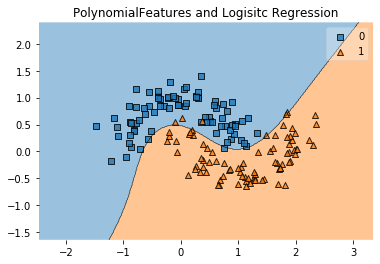

PolynomialFeatures and Logisitc Regression f1 =  0.9575601724604332


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### YOUR CODE HERE
clf = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression())])
clf.fit(X_train, y_train)
    
plt.title('PolynomialFeatures and Logisitc Regression')
plot_decision_regions(X_test, y_test, clf)
plt.show()
    
print("PolynomialFeatures and Logisitc Regression f1 = ", f1_score(y_test, clf.predict(X_test), average = 'weighted'))

Качество SVM с rbf немного лучше, однако разделяющая поверхность, как мне кажется, более правильная для Логистической регрессии с полиномиальными признаками. Кроме того этот метод работает лучше, чем SVM с любым полиномиальным ядром и сигмоидным ядром

Я использовала степень 3, потому что это оптимальная степень для SVM с полиномиальным ядром. 

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

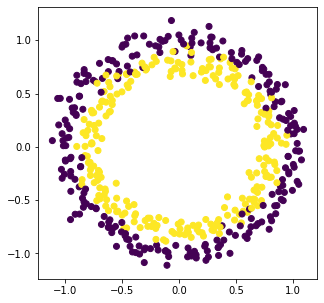

In [16]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

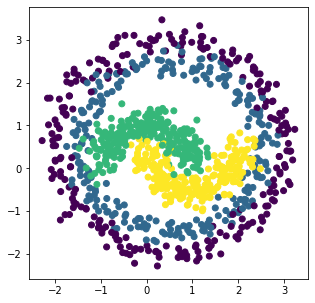

In [17]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

/Users/alina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


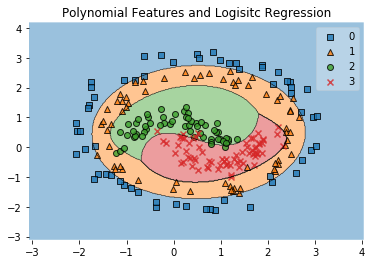

Polynomial Features and Logisitc Regression f1 =  0.9401109886749782


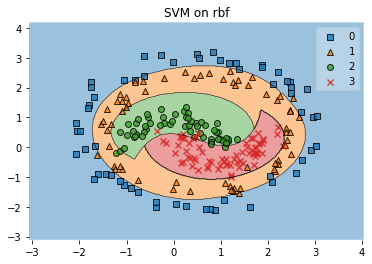

SVM on rbf f1 =  0.936080615942029


In [29]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.25, random_state = 42)

clf_lin = Pipeline([("poly_features", PolynomialFeatures(3)), ("clf", LogisticRegression(C=5))])
clf_svm = SVC(kernel='rbf', C=3)

models = zip(['Polynomial Features and Logisitc Regression', 'SVM on rbf'],
            [clf_lin, clf_svm])

for name, model in models:
    model.fit(X_train, y_train)
    
    plt.title(name)
    plot_decision_regions(X_test, y_test, model)
    plt.show()
    
    print(name, "f1 = ", f1_score(y_test, model.predict(X_test), average = 'weighted'))
    

Построением новых признаков можно намного улучшить качество модели. Но нужно посмотреть на признаки и примерно понять какого типа функцию нужно строить. Однако, как мне кажется, SVM с ядром rbf более удобный, потому что хорошо находит даже сложные разделяющие поверхности без построения новых признаков. 